## Critical Temperature of Superconductors

### Support Vector Machines

*Submitted By: Rabindra Nepal*

In [252]:
import os, math, time
import numpy as np
import pandas as pd
import random
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score

In [291]:
# load dataset
df = pd.read_csv('./data/train.csv')
unique_materials = pd.read_csv('./data/unique_m.csv')

In [292]:
unique_materials.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [293]:
# not Fe or Cu based superconductors
def other_class(unique_materials):
    other_class = []
    for f, c in zip(unique_materials.Fe.values, unique_materials.Cu.values):
        if f == 0.0 and c == 0.0:
            other_class.append(1.0)
        else:
            other_class.append(0.0)
    return np.array(other_class)

In [294]:
# adding some new columns in df
df['material'] = unique_materials.material
df['Fe'] = unique_materials.Fe
df['Cu'] = unique_materials.Cu
df['Other'] = other_class(unique_materials)

In [295]:
# shuffling
df = shuffle(df)

In [296]:
print('Fe based superconductors: ', df[df.Fe != 0].shape[0])
print('Cu based superconductors: ', df[df.Cu != 0].shape[0])
print('Other (not Fe and Cu) based superconductors: ', df[df.Other != 0].shape[0])

Fe based superconductors:  2339
Cu based superconductors:  10838
Other (not Fe and Cu) based superconductors:  8535


In [297]:
y = df.critical_temp
X = df.drop(columns=['material', 'Fe', 'Cu', 'Other', 'critical_temp'], inplace=False)

Hypothesis testing:

$H_0$: a material with critial temperature $T_c$ is not a high-$T_c$ superconductor.

In [298]:
T_sep = 10
y = (y < T_sep).astype(np.int)

In [302]:
df.critical_temp.values

array([ 6.3 , 17.1 , 15.  , ..., 64.  ,  4.75,  2.75])

In [300]:
y.values

array([1, 0, 0, ..., 0, 1, 1])

**Scaling**

In [278]:
# scaling 

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

C:\Users\nepal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nepal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Principle Component Analysis**

In [280]:
pca = PCA(n_components=16)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [281]:
pca.explained_variance_ratio_.sum()

0.94800540417299

In [282]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [283]:
# Hyperparameter tuning with cross-validation

In [249]:
clf = svm.SVC()

In [170]:
params_grid = {"C": [100, 500, 1000, 10000], "gamma": [0.01, 0.001, 0.0001, 0.00001]}

In [171]:
clf_cv = GridSearchCV(clf, params_grid, cv=5)

In [172]:
clf_cv.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [100, 500, 1000], 'gamma': [0.001, 0.0001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [174]:
clf_cv.best_params_

{'C': 1000, 'gamma': 0.001}

In [183]:
clf_cv.best_score_

0.9290417401528512

In [254]:
# Best model (with further tuning)

In [284]:
clf = svm.SVC(C=2000, gamma=0.001)

In [285]:
clf.fit(X_train_pca, y_train)

SVC(C=2000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [286]:
y_test_pred = clf.predict(X_test_pca)

In [287]:
confusion_matrix(y_test, y_test_pred)

array([[2562,  109],
       [ 164, 1418]], dtype=int64)

In [290]:
print('accuracy: ', accuracy_score(y_test, y_test_pred))
print('precision: ', precision_score(y_test, y_test_pred))
print('recall: ', recall_score(y_test, y_test_pred))
print('f1-score: ', f1_score(y_test, y_test_pred))

accuracy:  0.9358100164589701
precision:  0.9286182056319581
recall:  0.8963337547408344
f1-score:  0.9121904149244131


In [289]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2671
           1       0.93      0.90      0.91      1582

   micro avg       0.94      0.94      0.94      4253
   macro avg       0.93      0.93      0.93      4253
weighted avg       0.94      0.94      0.94      4253



### SVM Regression

Regression model to predict the value of critical temperature

In [317]:
y = df.critical_temp
X = df.drop(columns=['material', 'Fe', 'Cu', 'Other', 'critical_temp'], inplace=False)

In [318]:
# scaling 

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

C:\Users\nepal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nepal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [320]:
pca = PCA(n_components=16)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [321]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [322]:
reg = svm.SVR(gamma='scale', C=1000.0)

In [323]:
reg.fit(X_train_pca, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [324]:
y_test_predr = reg.predict(X_test_pca)

In [325]:
r2_score(y_test, y_test_predr)

0.8513227883860006

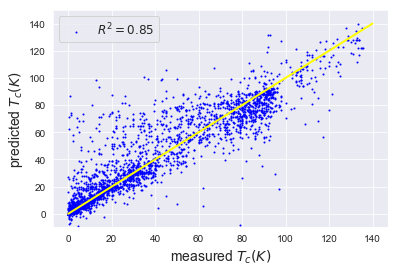

In [327]:
sns.set_style("darkgrid")
plt.scatter(y_test, y_test_predr, s=1, c='b', label="$R^2 = 0.85$");
plt.plot([0, 140], [0, 140], c='yellow', linewidth=2);
plt.legend();
plt.legend(fontsize='large')
plt.xlabel('measured $T_c(K)$', fontsize=14)
plt.ylabel('predicted $T_c(K)$', fontsize=14);
plt.ylim(-10, 150);
plt.savefig("svr-prediction.pdf")